In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [3]:
galaxy_j5 = df_events.loc[(df_events["model"] == "Samsung Galaxy J5") & (df_events["event"] == "conversion"),:]
galaxy_j5 = galaxy_j5[["city","region","country","event","timestamp","condition"]]
galaxy_j5.head()

,city,region,country,event,timestamp,condition
6985,NaN,NaN,NaN,conversion,2018-02-09 22:07:07,Bom
18502,NaN,NaN,NaN,conversion,2018-01-10 18:59:05,Muito Bom
20959,NaN,NaN,NaN,conversion,2018-04-21 18:54:14,Excelente
37398,NaN,NaN,NaN,conversion,2018-04-29 13:18:15,Bom
50967,NaN,NaN,NaN,conversion,2018-03-13 12:24:21,Muito Bom


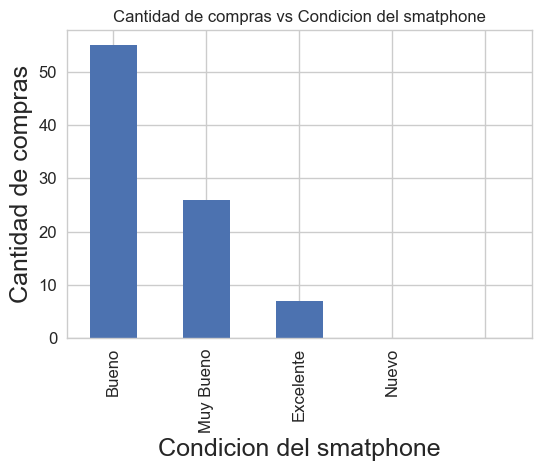

In [4]:
condition = galaxy_j5["condition"].value_counts()

ax = condition.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(6,4),legend = False, fontsize = 12)
ax.set_xlabel("Condicion del smatphone", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["Bueno","Muy Bueno","Excelente","Nuevo"])
plt.show()

In [11]:
#dias

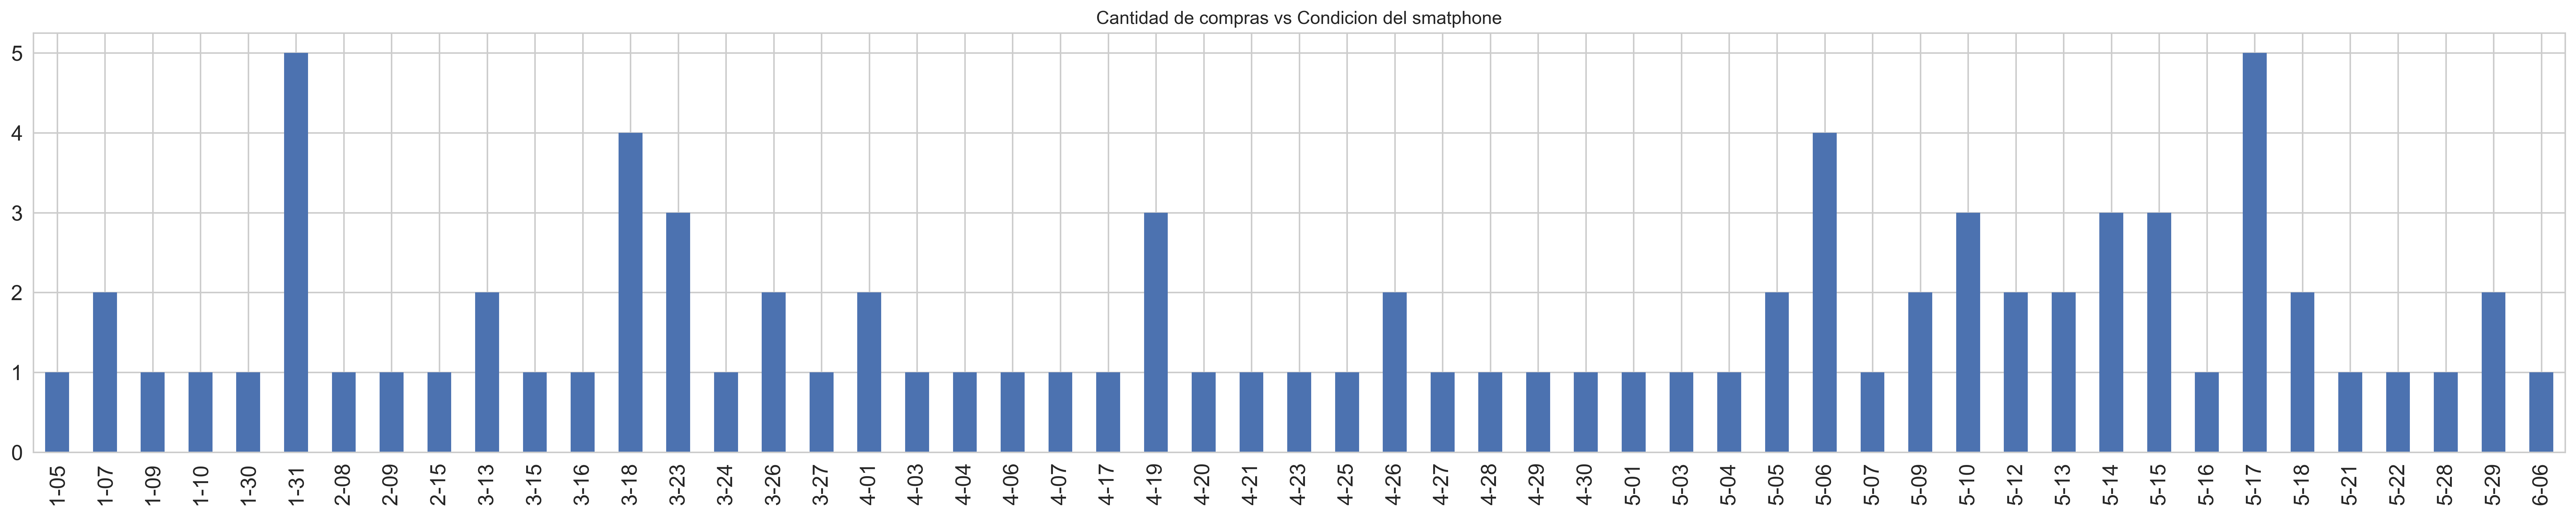

In [14]:
galaxy_j5['dia_mes'] = galaxy_j5['timestamp'].apply(lambda x: x.split(' ')[0][-5:])
#galaxy_j5.sort_values(by = galaxy)
fechas = galaxy_j5['dia_mes'].value_counts()
#fechas  = fechas.to_frame(name = "Fechas").reset_index()
fechas
#fechas.columns= [["Fecha","Frecuencia"]]
#fechas.sort_values(fechas["Fecha"])
fechas
#fechas.sort(fechas.index)

fechas = galaxy_j5.sort_values(by = "timestamp",ascending = True)["timestamp"]
meses=pd.to_datetime(fechas).dt.month
dias=pd.to_datetime(fechas).dt.day
serie_final= meses.map(lambda x: str(x))+'-'+dias.map(lambda x: str(x) if x>9 else "0"+str(x))
serie_final = serie_final.value_counts().sort_index()



#galaxy_j5["mes"] = pd.to_datetime(galaxy_j5["timestamp"]).dt.month
#galaxy_j5["dia"] = pd.to_datetime(galaxy_j5["timestamp"]).dt.day
#galaxy_j5
ax = serie_final.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(30,5),legend = False, fontsize = 14)

#plt.rc('figure', dpi=350)
#g=sns.barplot(x=serie_final.index,y=serie_final.values)
#g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.show()


In [15]:
serie_final

1-05    1
1-07    2
1-09    1
1-10    1
1-30    1
1-31    5
2-08    1
2-09    1
2-15    1
3-13    2
3-15    1
3-16    1
3-18    4
3-23    3
3-24    1
3-26    2
3-27    1
4-01    2
4-03    1
4-04    1
4-06    1
4-07    1
4-17    1
4-19    3
4-20    1
4-21    1
4-23    1
4-25    1
4-26    2
4-27    1
4-28    1
4-29    1
4-30    1
5-01    1
5-03    1
5-04    1
5-05    2
5-06    4
5-07    1
5-09    2
5-10    3
5-12    2
5-13    2
5-14    3
5-15    3
5-16    1
5-17    5
5-18    2
5-21    1
5-22    1
5-28    1
5-29    2
6-06    1
Name: timestamp, dtype: int64

In [27]:
serie_final_t = serie_final.to_dict()
serie_final_t

for i in range (1,7):
    for j in range (1,31):
        if j <10:
            fecha = str(i)+'-0'+str(j)
        else:
            fecha = str(i)+'-'+str(j)
        
        if i == 2 and j <= 29:
            break
        if i in [4,6] and j == 31:
            break
        if not fecha in serie_final_t:
            serie_final_t[fecha] = 0

serie_final_t = pd.Series(serie_final_t)
serie_final_t

1-01    0
1-02    0
1-03    0
1-04    0
1-05    1
1-06    0
1-07    2
1-08    0
1-09    1
1-10    1
1-11    0
1-12    0
1-13    0
1-14    0
1-15    0
1-16    0
1-17    0
1-18    0
1-19    0
1-20    0
1-21    0
1-22    0
1-23    0
1-24    0
1-25    0
1-26    0
1-27    0
1-28    0
1-29    0
1-30    1
       ..
6-01    0
6-02    0
6-03    0
6-04    0
6-05    0
6-06    1
6-07    0
6-08    0
6-09    0
6-10    0
6-11    0
6-12    0
6-13    0
6-14    0
6-15    0
6-16    0
6-17    0
6-18    0
6-19    0
6-20    0
6-21    0
6-22    0
6-23    0
6-24    0
6-25    0
6-26    0
6-27    0
6-28    0
6-29    0
6-30    0
Length: 154, dtype: int64

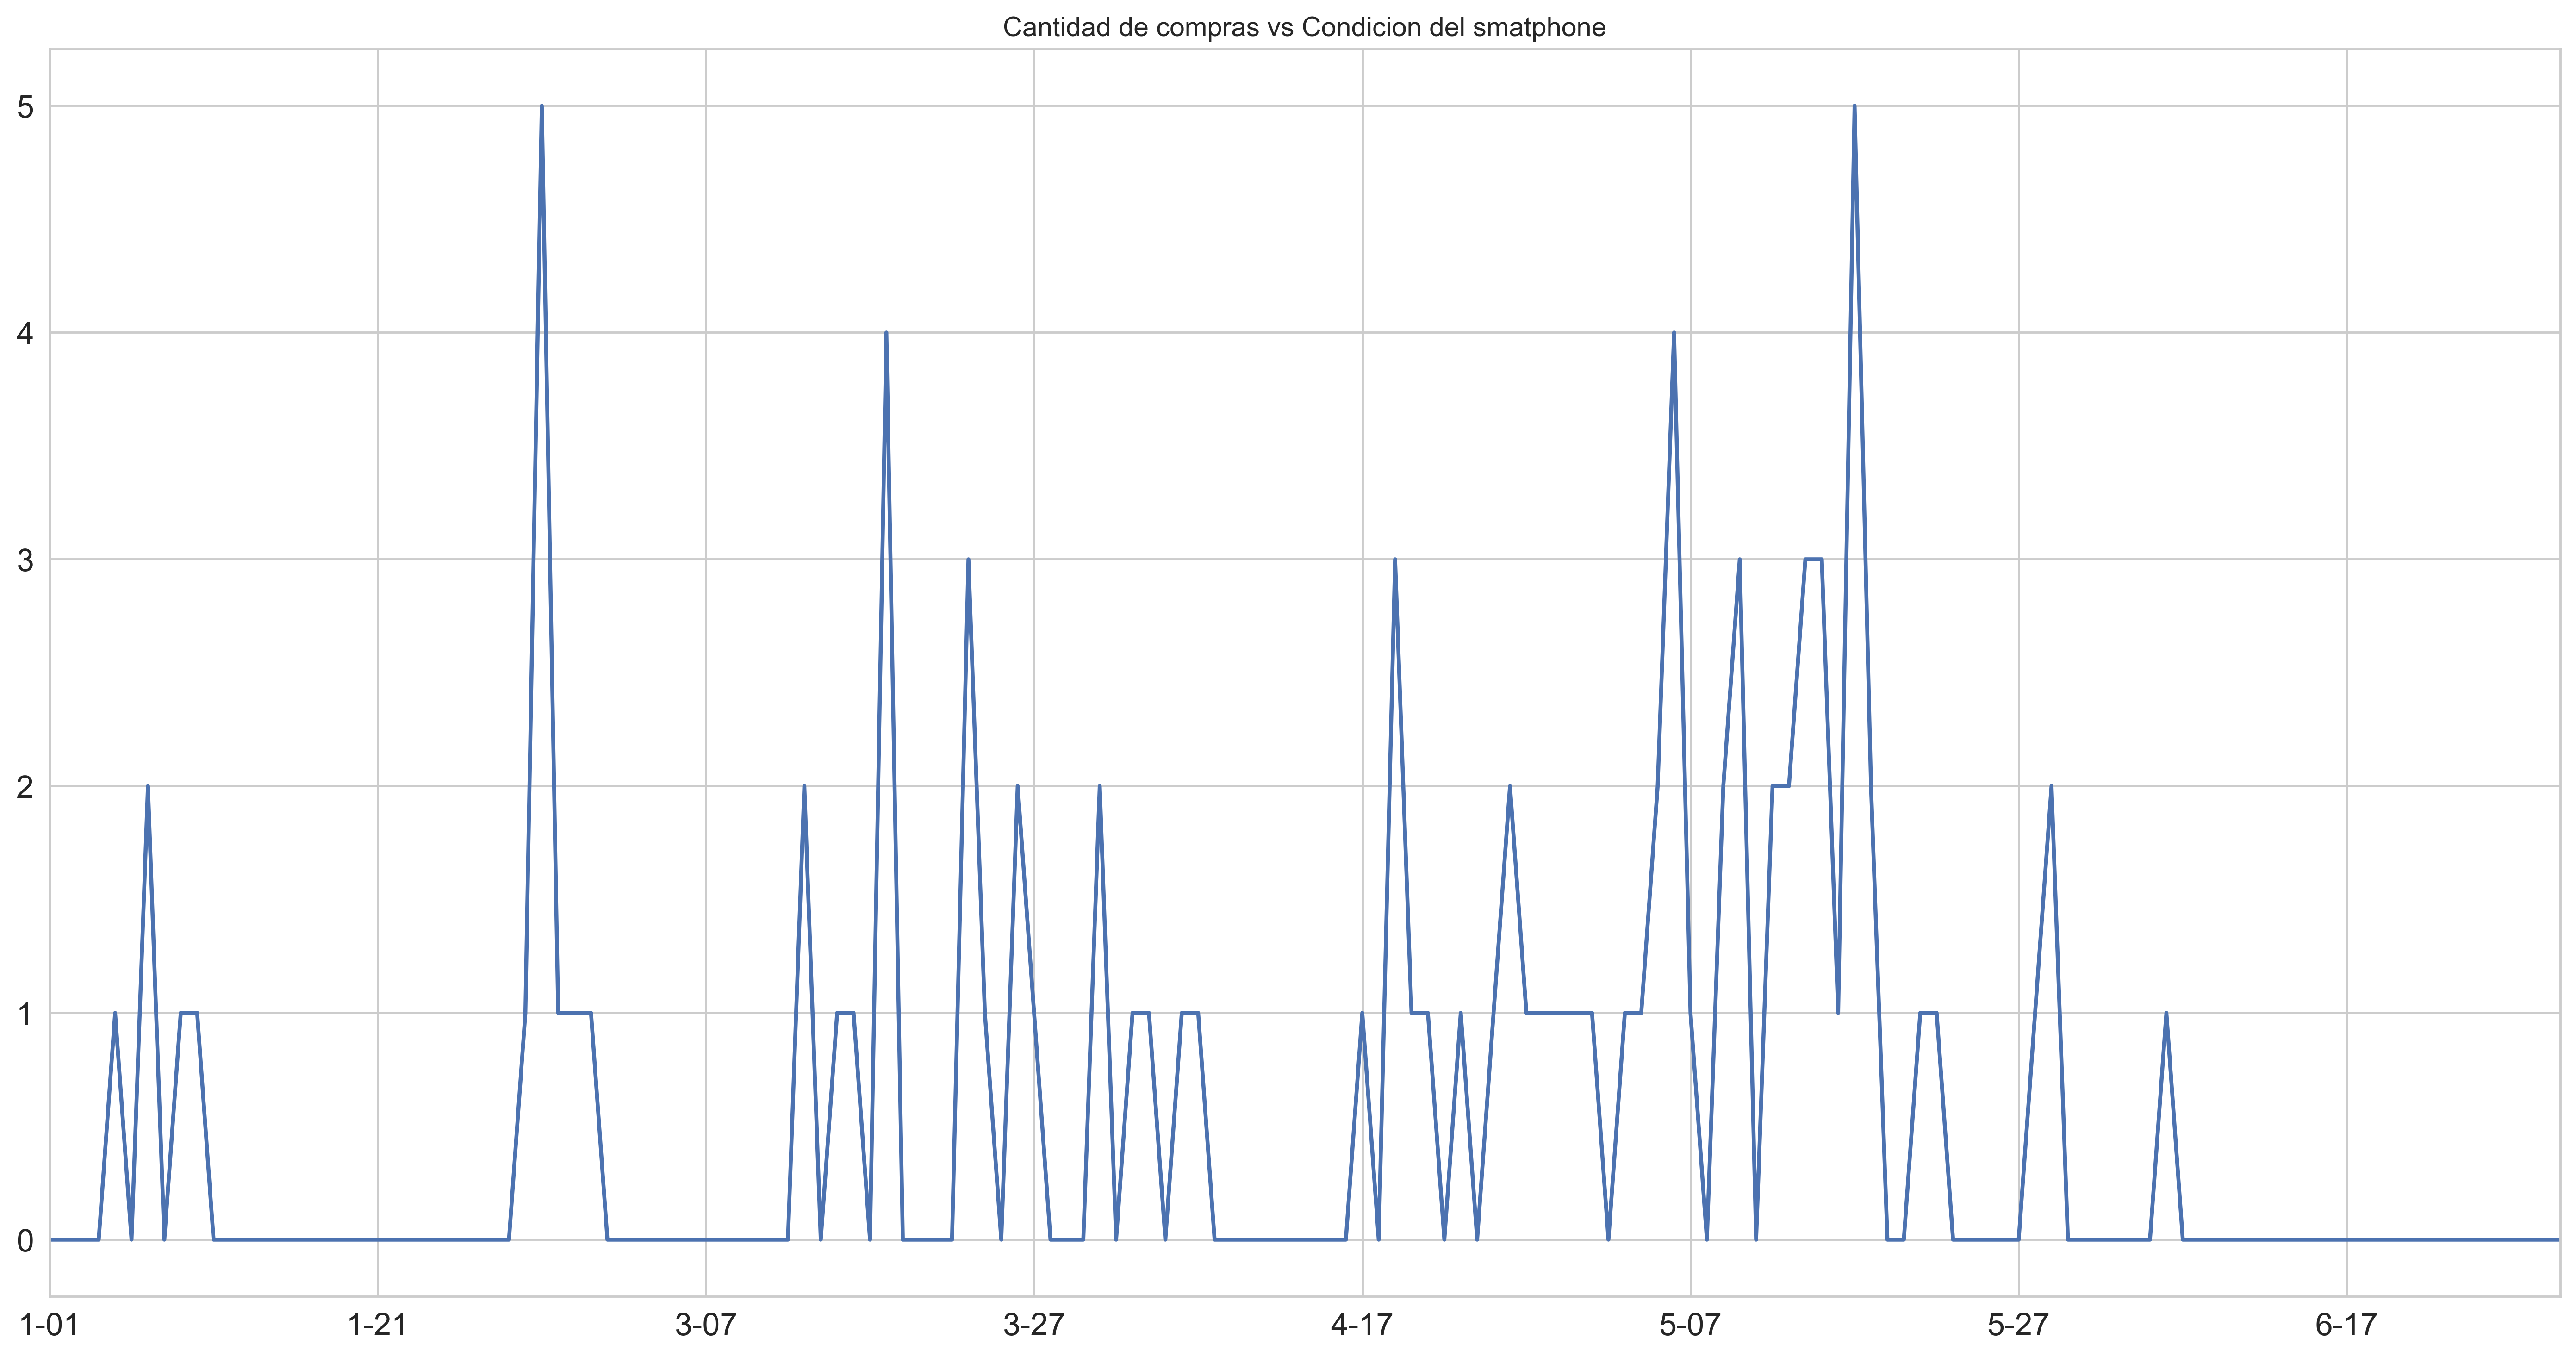

In [44]:
ax = serie_final_t.plot(kind = 'line', title = "Cantidad de compras vs Condicion del smatphone",figsize =(20,10),legend = False, fontsize = 14)